# OLS, Linear, Ridge and Lasso Regression - Example

### Importing and Reading data

In [2]:
# Importing libraries
import pandas as pd 
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing data
cars_data = pd.read_csv('datasets/UsedCarsPrice.csv', index_col = 0, na_values = ["??", "????"])
cars_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


### Basic EDA and Statistics

In [4]:
# Print the information of the data
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [5]:
# Print the shape of the data
cars_data.shape

(1436, 10)

#### Identifying Missing Values

In [6]:
# Check the count of missing values in each column
cars_data.isna().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

The attributes Age, Kilometers, FuelType, HP and MetColor have missing values

#### Missing value imputation

In [7]:
# Filling the missing values with the relevant central statistics
cars_data['Age'].fillna(cars_data['Age'].mean(), inplace=True)
cars_data['KM'].fillna(cars_data['KM'].median(), inplace=True)
cars_data['HP'].fillna(cars_data['HP'].mean(), inplace=True)
cars_data['FuelType'].fillna(cars_data['FuelType'].mode()[0], inplace=True)
cars_data['MetColor'].fillna(cars_data['MetColor'].mode()[0], inplace=True)

cars_data.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

### Data Preprocessing

In [8]:
# Replacing string values in `Doors` column with appropriate numerals and converting that column to numeric.
cars_data['Doors'].replace({'three': 3, 'four': 4, 'five':5}, inplace=True)
cars_data['Doors'] = cars_data['Doors'].astype(int)

cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   float64
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int32  
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int32(1), int64(4), object(1)
memory usage: 117.8+ KB


In [9]:
# Applying encoding on the categorical attributes
cars_data = pd.get_dummies(cars_data,drop_first=True)

cars_data.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986.0,90.0,1.0,0,2000,3,1165,True,False
1,13750,23.0,72937.0,90.0,1.0,0,2000,3,1165,True,False
2,13950,24.0,41711.0,90.0,1.0,0,2000,3,1165,True,False
3,14950,26.0,48000.0,90.0,0.0,0,2000,3,1165,True,False
4,13750,30.0,38500.0,90.0,0.0,0,2000,3,1170,True,False


In [10]:
cars_data['FuelType_Diesel'] = cars_data['FuelType_Diesel'].replace({False: 0, True: 1})
cars_data['FuelType_Petrol'] = cars_data['FuelType_Petrol'].replace({False: 0, True: 1})

cars_data.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986.0,90.0,1.0,0,2000,3,1165,1,0
1,13750,23.0,72937.0,90.0,1.0,0,2000,3,1165,1,0
2,13950,24.0,41711.0,90.0,1.0,0,2000,3,1165,1,0
3,14950,26.0,48000.0,90.0,0.0,0,2000,3,1165,1,0
4,13750,30.0,38500.0,90.0,0.0,0,2000,3,1170,1,0


In [11]:
from sklearn.preprocessing import MinMaxScaler
# Save numerical columns in a list
cnames = ["Price", "Age", "KM", "HP", "CC", "Weight"]
sc = MinMaxScaler()
for col in cnames:
    cars_data[col] = sc.fit_transform(cars_data[col].values.reshape(-1,1))

cars_data.head(5)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,0.325044,0.278481,0.193355,0.170732,1.0,0,1.0,3,0.268293,1,0
1,0.333925,0.278481,0.300149,0.170732,1.0,0,1.0,3,0.268293,1,0
2,0.341030,0.291139,0.171647,0.170732,1.0,0,1.0,3,0.268293,1,0
3,0.376554,0.316456,0.197528,0.170732,0.0,0,1.0,3,0.268293,1,0
4,0.333925,0.367089,0.158433,0.170732,0.0,0,1.0,3,0.276423,1,0


In [12]:
cars_data.to_csv('datasets/preprocessed_UsedCarsPrice.csv', index = False)

In [13]:
# Splitting the target and independent variables
X = cars_data.drop('Price', axis = 1)
Y = cars_data['Price']

## Model Building

##### Dividing data into train and test 

In [14]:
# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

print(x_train.shape)
print(x_test.shape)

(1148, 10)
(288, 10)


#### 1) OLS Method

The ordinary least squares (OLS) algorithm is a method for estimating the parameters of a linear regression model. The OLS algorithm aims to find the values of the linear regression model’s parameters (i.e., the coefficients) that minimize the sum of the squared residuals. 

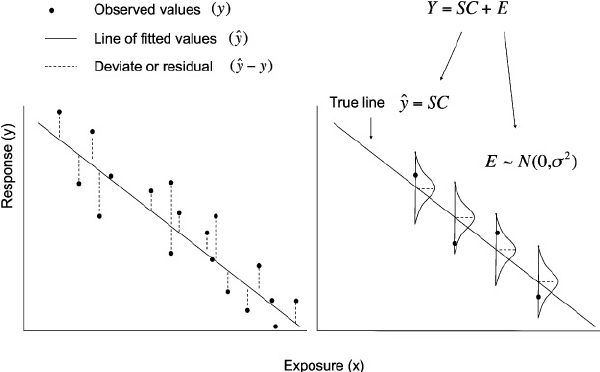

The residuals are the differences between the observed values of the dependent variable and the predicted values of the dependent variable given the independent variables. Ordinary Least squares is an optimization technique. 

In [15]:
import statsmodels.api as sma

# Bias term needs to coded separately
x_train = sma.add_constant(x_train)
x_test = sma.add_constant(x_test)

x_train.head()

,const,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
366,1.0,0.430380,0.090136,0.227642,0.0,0,0.142857,3,0.040650,0,1
1141,1.0,0.911392,0.424364,0.138211,1.0,0,0.000000,5,0.056911,0,1
1337,1.0,0.936709,0.261865,0.333333,1.0,0,0.428571,4,0.056911,0,1
139,1.0,0.240506,0.094646,0.333333,1.0,0,0.428571,5,0.211382,0,1
271,1.0,0.468354,0.198338,0.333333,1.0,0,0.428571,5,0.121951,0,1


In [16]:
ols = sma.OLS(y_train, x_train)
ols = ols.fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     594.5
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:11:19   Log-Likelihood:                 1791.6
No. Observations:                1148   AIC:                            -3561.
Df Residuals:                    1137   BIC:                            -3506.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3790      0.018     20.943      0.000       0.344       0.415
Age                -0.3262      0.009    -36.180      0.000      -0.344      -0.308
KM                 -0.1649      0.014    -11.940      0.000      -0.192      -0.138
HP                  0.1696      0.025      6.877      0.000       0.121       0.218
MetColor            0.0038      0.003      1.131      0.258      -0.003       0.010
Automatic           0.0052      0.006      0.806      0.420      -0.007       0.018
CC                 -0.0513      0.014     -3.746      0.000      -0.078      -0.024
Doors              -0.0018      0.002     -1.031      0.303      -0.005       0.002
Weight              0.5001      0.029     17.179      0.000       0.443       0.557
FuelType_Diesel     0.0566      0.019      2.904      0.004       0.018       0.095
FuelType_Petrol     0.0375      0.014      2.627      0.009       0.009       0.065
==============================================================================
Omnibus:                      243.291   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4124.337
Skew:                          -0.483   Prob(JB):                         0.00
Kurtosis:                      12.235   Cond. No.                         98.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Predicting the values
y_pred = ols.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
995,0.198934,0.184650
514,0.218472,0.200188
612,0.120782,0.140133
307,0.325044,0.286455
981,0.191829,0.228539


In [22]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate MAE, R2 Score and RMSE
y_train_pred = ols.predict(x_train)
y_pred = ols.predict(x_test)

print('Training R2-Score:', round(r2_score(y_train, y_train_pred), 3))
print('Testing R2-Score:', round(r2_score(y_test, y_pred), 3))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred)).round(3))

Training R2-Score: 0.839
Testing R2-Score: 0.83
Root Mean Square Error: 0.056


#### 2) Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

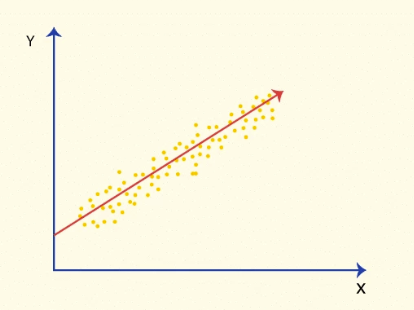

It seeks the optimal line that minimizes the sum of squared differences between predicted and actual values.

In [23]:
from sklearn.linear_model import LinearRegression

# Creating an object of the type LinearRegression
regressor = LinearRegression() 
regressor = regressor.fit(x_train, y_train)

In [24]:
print('Coefficients:', regressor.coef_.round(3))
print('Intercept:', regressor.intercept_.round(3))

Coefficients: [ 0.    -0.326 -0.165  0.17   0.004  0.005 -0.051 -0.002  0.5    0.057
  0.037]
Intercept: 0.379


In [26]:
# Calculate MAE, R2 Score and RMSE
y_train_pred = regressor.predict(x_train)
y_pred = regressor.predict(x_test)

print('Training R2-Score:', round(r2_score(y_train, y_train_pred), 3))
print('Testing R2-Score:', round(r2_score(y_test, y_pred), 3))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred)).round(3))

Training R2-Score: 0.839
Testing R2-Score: 0.83
Root Mean Square Error: 0.056


In [27]:
# Predictors
predictors = x_train.columns
print(predictors)

Index(['const', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_Diesel', 'FuelType_Petrol'],
      dtype='object')


In [28]:
# Coefficients with the variables
coef = pd.Series(regressor.coef_, predictors).sort_values()
coef

Age               -0.326169
KM                -0.164854
CC                -0.051262
Doors             -0.001755
const              0.000000
MetColor           0.003815
Automatic          0.005180
FuelType_Petrol    0.037483
FuelType_Diesel    0.056593
HP                 0.169639
Weight             0.500095
dtype: float64

<Axes: title={'center': 'Model Coefficients for linear regression'}>

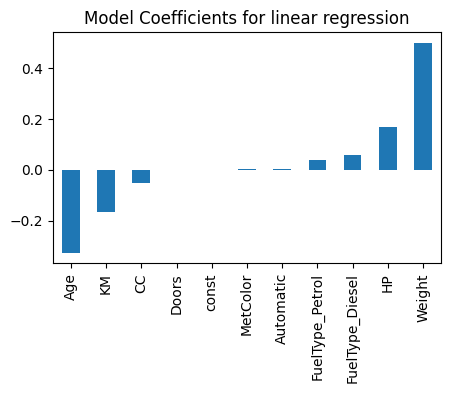

In [29]:
plt.figure(figsize=(5,3))
coef.plot(kind = 'bar', title = 'Model Coefficients for linear regression')

####  Regularization

Regularisation is a process of introducing additional information in order to prevent overfitting. There are two types L1 and L2 Regularization (Lasso and Ridge regression, respectively), taking the name from L1 Norm and L2 norm of coefficients of linear regression.

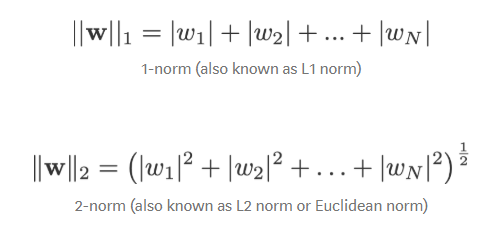

Consider the linear regression equation in the below format (b is bias term here):

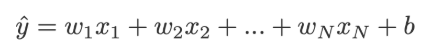

Calculation of Loss functions will be in the following manner:


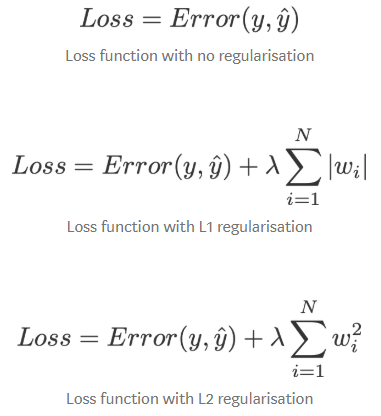

Regularization techniques concentrate on minimizing the loss function, rather than look at error terms

#### 3) Ridge Regression : L2 Regularization

- Alpha is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually.
- And as alpha tends to zero, the model tends to become linear regression.

In [30]:
ridgeReg = Ridge(alpha = 0.01)
ridgeReg = ridgeReg.fit(x_train, y_train)

In [31]:
print('Coefficients:', ridgeReg.coef_.round(3))
print('Intercept:', ridgeReg.intercept_.round(3))

Coefficients: [ 0.    -0.326 -0.165  0.169  0.004  0.005 -0.051 -0.002  0.499  0.056
  0.037]
Intercept: 0.379


In [32]:
# Calculate MAE, R2 Score and RMSE
y_train_pred = ridgeReg.predict(x_train)
y_pred = ridgeReg.predict(x_test)

print('Training R2-Score:', round(r2_score(y_train, y_train_pred), 3))
print('Testing R2-Score:', round(r2_score(y_test, y_pred), 3))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred)).round(3))

Training R2-Score: 0.839
Testing R2-Score: 0.83
Root Mean Square Error: 0.056


In [33]:
# Coefficients with the variables
coef = pd.Series(ridgeReg.coef_, predictors).sort_values()
coef

Age               -0.326287
KM                -0.164915
CC                -0.050950
Doors             -0.001732
const              0.000000
MetColor           0.003818
Automatic          0.005239
FuelType_Petrol    0.037338
FuelType_Diesel    0.056415
HP                 0.169454
Weight             0.498700
dtype: float64

<Axes: title={'center': 'Model Coefficients for Ridge regression'}>

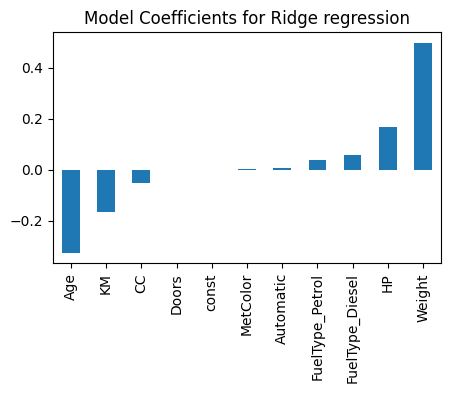

In [34]:
plt.figure(figsize=(5,3))
coef.plot(kind='bar', title = 'Model Coefficients for Ridge regression')

####  4) Lasso Regression : L1 Regularization

In [35]:
lassoReg = Lasso(alpha = 0.001)
lassoReg = lassoReg.fit(x_train,y_train)

In [36]:
print('Coefficients:', lassoReg.coef_.round(3))
print('Intercept:', lassoReg.intercept_.round(3))

Coefficients: [ 0.    -0.353 -0.146  0.08   0.001  0.     0.     0.002  0.262 -0.
  0.   ]
Intercept: 0.451


In [38]:
# Calculate MAE, R2 Score and RMSE

y_train_pred = lassoReg.predict(x_train)
y_pred = lassoReg.predict(x_test)

print('Training R2-Score:', round(r2_score(y_train, y_train_pred), 3))
print('Testing R2-Score:', round(r2_score(y_test, y_pred), 3))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred)).round(3))

Training R2-Score: 0.821
Testing R2-Score: 0.792
Root Mean Square Error: 0.062


In [39]:
# Coefficients with the variables
coef = pd.Series(lassoReg.coef_, predictors).sort_values()
coef

Age               -0.353281
KM                -0.146032
const              0.000000
Automatic          0.000000
CC                 0.000000
FuelType_Diesel   -0.000000
FuelType_Petrol    0.000000
MetColor           0.000851
Doors              0.001968
HP                 0.079611
Weight             0.261746
dtype: float64

<Axes: title={'center': 'Model Coefficients for Lasso regression'}>

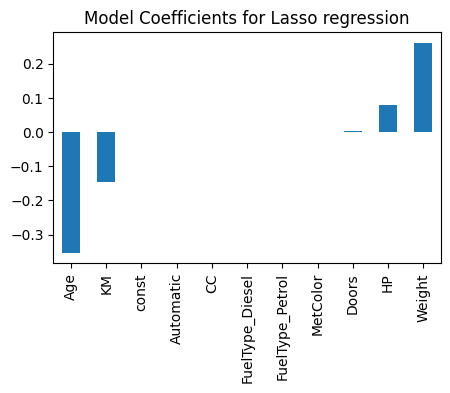

In [40]:
plt.figure(figsize=(5,3))
coef.plot(kind = 'bar', title = 'Model Coefficients for Lasso regression')